In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [4]:
%cd nlpProject/

/content/drive/MyDrive/nlpProject


In [5]:
%cd filter_programs

/content/drive/MyDrive/nlpProject/filter_programs


In [6]:
import nltk 
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [8]:
import pandas as pd

In [9]:
df = pd.read_csv('/content/drive/MyDrive/nlpProject/all_reviews.csv')
shuffled_df = df.sample(frac =1)
shuffled_df.to_csv("shuffled_data.csv", index=False)

In [10]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torch
# Use cuda if present
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device available for running: ")
print(device)

Device available for running: 
cuda


Columns in the original dataset:

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')
Number of rows per star rating:
4    2000
2    2000
1    2000
5    2000
3    2000
Name: stars, dtype: int64


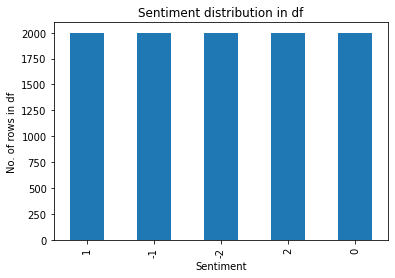

In [11]:
import matplotlib.pyplot as plt 
from gensim.utils import simple_preprocess
from gensim.parsing.porter import PorterStemmer
from sklearn.model_selection import train_test_split

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from gensim import corpora
import torch
top_data_df = pd.read_csv("shuffled_data.csv")

print("Columns in the original dataset:\n")
print(top_data_df.columns)

print("Number of rows per star rating:")
print(top_data_df['stars'].value_counts())

# Function to map stars to sentiment
def map_sentiment(stars_received):
    if stars_received == 1:
        return -2
    elif stars_received == 2:
        return -1
    elif stars_received == 3:
        return 0
    elif stars_received == 4:
        return 1
    else:
        return 2
# Mapping stars to sentiment into three categories
top_data_df['sentiment'] = [ map_sentiment(x) for x in top_data_df['stars']]
# Plotting the sentiment distribution
plt.figure()
pd.value_counts(top_data_df['sentiment']).plot.bar(title="Sentiment distribution in df")
plt.xlabel("Sentiment")
plt.ylabel("No. of rows in df")
plt.show()

In [12]:
# Function to retrieve top few number of each category
def get_top_data(top_n = 5000):
    top_data_df_five = top_data_df[top_data_df['sentiment'] == 2].head(top_n)
    top_data_df_four = top_data_df[top_data_df['sentiment'] == 1].head(top_n)
    top_data_df_three = top_data_df[top_data_df['sentiment'] == 0].head(top_n)
    top_data_df_two = top_data_df[top_data_df['sentiment'] == -1].head(top_n)
    top_data_df_one = top_data_df[top_data_df['sentiment'] == -2].head(top_n)
    top_data_df_small = pd.concat([top_data_df_five, top_data_df_four, top_data_df_three, top_data_df_two, top_data_df_one])
    return top_data_df_small


In [13]:
# Function call to get the top 10000 from each sentiment
top_data_df_small = get_top_data(top_n=10000)

# After selecting top few samples of each sentiment
print("After segregating and taking equal number of rows for each sentiment:")
print(top_data_df_small['sentiment'].value_counts())
top_data_df_small.head(10)

After segregating and taking equal number of rows for each sentiment:
 2    2000
 1    2000
 0    2000
-1    2000
-2    2000
Name: sentiment, dtype: int64


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,sentiment
3,iF31vBhRtul3wE7i41u4FA,HciOYCvm2kSqYUYIPkmeMg,DvkSkF83xDONjkNIoEPRnQ,5,2,1,1,Got the manager's recommendations on a full di...,2018-05-08 17:12:41,2
7,Took2Zx2nfXjtOfLhQI9tA,INUDMj7EmrLlTh6qDNprAg,8uF-bhJFgT4Tn6DTb27viA,5,0,0,0,Walked here from our condo and found this awes...,2016-07-03 17:03:22,2
9,9TMie2ExIrfteJUR9Cd04A,IB3UNGdt4M6-rta16MT5kA,xsTiT3S9J87uYB1P8DHLgQ,5,2,1,0,Great selection of teachers and classes. Good ...,2013-10-24 06:21:49,2
14,UdKXbsNyrbUMKm3ou4B4Rw,SUFd_R_9HzYq5Ykv65sDiA,Dtuf4vD0znzwJW9vk3iTNw,5,1,0,1,Excellent price for sushi and I love their spe...,2015-02-16 18:33:44,2
18,wtHidkAfRhXE0FO1wb_Z6A,Jn3i1AGyDp3FmbIBCjGkzg,ga7jZd-JccpMqdSTgY2lUA,5,1,0,0,The food was great nice character! We sta on t...,2017-03-03 20:08:17,2
24,jzfO6zmCBI6JOH_mCUtXrw,GijHO9238eUBrigqBkXBnA,g04aAvgol7IW8buqSbT4xA,5,0,0,0,"Not only was the food excellent, but the peopl...",2018-05-19 03:21:45,2
26,5dxv2inl0muxU9L-MUPjGA,oQ-Aj7QNn_7lAuigPDmwZw,E-4t5Hoon6aVFTWDPz26fQ,5,1,0,0,Amazing food and Amazing service! They know wh...,2015-07-04 16:26:53,2
27,YshxirKHQuemky5Oz1zD_A,WEHARuTmWKB_1J_90DSVWA,PBtZNTQl5tRReeC8It1G7g,5,2,0,0,*This review is just about the Fountain Grill*...,2013-08-15 18:39:12,2
28,FVF-3u_wluP5L_n5Dp6V0g,Iaas1x0jwzfcAK1E5LtACA,lpfrjbjIWC0BNZThaSDMLw,5,0,0,0,This is the best Thai food in St. Louis. Chick...,2015-08-06 22:28:40,2
44,k9JDHf-v7G46ps0PEVlw8g,jDLeW4d-8WqMkikCTHFJ5g,D2kZP7jvrWTuRzcPY6NbqA,5,0,0,0,Talk about amazing breakfast this is your spot...,2016-04-23 18:03:15,2


In [14]:
# Tokenize the text column to get the new column 'tokenized_text'
top_data_df_small['tokenized_text'] = [simple_preprocess(line, deacc=True) for line in top_data_df_small['text']] 
print(top_data_df_small['tokenized_text'].head(10))
porter_stemmer = PorterStemmer()

3     [got, the, manager, recommendations, on, full,...
7     [walked, here, from, our, condo, and, found, t...
9     [great, selection, of, teachers, and, classes,...
14    [excellent, price, for, sushi, and, love, thei...
18    [the, food, was, great, nice, character, we, s...
24    [not, only, was, the, food, excellent, but, th...
26    [amazing, food, and, amazing, service, they, k...
27    [this, review, is, just, about, the, fountain,...
28    [this, is, the, best, thai, food, in, st, loui...
44    [talk, about, amazing, breakfast, this, is, yo...
Name: tokenized_text, dtype: object


In [15]:
# Get the stemmed_tokens
top_data_df_small['stemmed_tokens'] = [[porter_stemmer.stem(word) for word in tokens] for tokens in top_data_df_small['tokenized_text'] ]
top_data_df_small['stemmed_tokens'].head(10)

3     [got, the, manag, recommend, on, full, dinner,...
7     [walk, here, from, our, condo, and, found, thi...
9     [great, select, of, teacher, and, class, good,...
14    [excel, price, for, sushi, and, love, their, s...
18    [the, food, wa, great, nice, charact, we, sta,...
24    [not, onli, wa, the, food, excel, but, the, pe...
26    [amaz, food, and, amaz, servic, thei, know, wh...
27    [thi, review, is, just, about, the, fountain, ...
28    [thi, is, the, best, thai, food, in, st, loui,...
44    [talk, about, amaz, breakfast, thi, is, your, ...
Name: stemmed_tokens, dtype: object

In [16]:
def split_train_test(top_data_df_small, test_size=0.1, shuffle_state=True):
    X_train, X_test, Y_train, Y_test = train_test_split(top_data_df_small[['business_id', 'cool', 'date', 'funny', 'review_id', 'stars', 'text', 'useful', 'user_id', 'stemmed_tokens']], 
                                                        top_data_df_small['sentiment'], 
                                                        shuffle=shuffle_state,
                                                        test_size=test_size, 
                                                        random_state=15)
    print("Value counts for Train sentiments")
    print(Y_train.value_counts())
    print("Value counts for Test sentiments")
    print(Y_test.value_counts())
    print(type(X_train))
    print(type(Y_train))
    X_train = X_train.reset_index()
    X_test = X_test.reset_index()
    Y_train = Y_train.to_frame()
    Y_train = Y_train.reset_index()
    Y_test = Y_test.to_frame()
    Y_test = Y_test.reset_index()
    print(X_train.head())
    return X_train, X_test, Y_train, Y_test

In [17]:
# Call the train_test_split
X_train, X_test, Y_train, Y_test = split_train_test(top_data_df_small)

Value counts for Train sentiments
-2    1812
 1    1806
 2    1804
-1    1799
 0    1779
Name: sentiment, dtype: int64
Value counts for Test sentiments
 0    221
-1    201
 2    196
 1    194
-2    188
Name: sentiment, dtype: int64
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
   index             business_id  cool                 date  funny  \
0   2842  j99PtxlKTW_u5alE4jiqHQ     0  2015-12-21 17:53:46      0   
1   1831  SVSafDWg9r2Q5XEVOLPSSA     1  2017-09-09 01:36:29      0   
2   9733  aY_n9RSaD2Yw09jSFFePew     0  2016-09-18 21:37:34      0   
3   9706  AbbIoHhBEMZndmIm07L4Og     0  2018-08-23 21:05:53      0   
4    912  Tq5jFk_BMSJG8-flqj5Bgw     0  2017-06-06 21:17:58      0   

                review_id  stars  \
0  kiTPBfytCF_Q-Zoug-nJUA      5   
1  ZLVJ03nuL07Q8bD_guahxw      5   
2  -Pg_rr4Xa_wcPaQfeMGDUA      5   
3  RG7X1VKlo-FpkZ6PWkcXYQ      1   
4  HJpTp-cXIAIBm7dyARaXBg      4   

                                                text  us

In [18]:
# Use cuda if present
device = torch.device("cpu")
print("Device available for running: ")
print(device)

Device available for running: 
cpu


In [19]:
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        
        # Linear function 1: vocab_size --> 500
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity 1
        self.relu1 = nn.ReLU()

        # Linear function 2: 500 --> 500
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.relu2 = nn.ReLU()

        # Linear function 3 (readout): 500 --> 3
        self.fc3 = nn.Linear(hidden_dim, output_dim)  

    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)

        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.relu2(out)

        # Linear function 3 (readout)
        out = self.fc3(out)

        return F.softmax(out, dim=1)

In [20]:
# Function to return the dictionary either with padding word or without padding
def make_dict(top_data_df_small, padding=True):
    if padding:
        print("Dictionary with padded token added")
        review_dict = corpora.Dictionary([['pad']])
        review_dict.add_documents(top_data_df_small['stemmed_tokens'])
    else:
        print("Dictionary without padding")
        review_dict = corpora.Dictionary(top_data_df_small['stemmed_tokens'])
    return review_dict

In [21]:
# Make the dictionary without padding for the basic models
review_dict = make_dict(top_data_df_small, padding=False)

VOCAB_SIZE = len(review_dict)
NUM_LABELS = 5

Dictionary without padding


In [23]:
# Function to make bow vector to be used as input to network
def make_bow_vector(review_dict, sentence):
    vec = torch.zeros(VOCAB_SIZE, dtype=torch.float64, device=device)
    for word in sentence:
        vec[review_dict.token2id[word]] += 1
    return vec.view(1, -1).float()
def make_target(label):
    if label == -2:
        return torch.tensor([0], dtype=torch.long, device=device)
    elif label == -1:
        return torch.tensor([1], dtype=torch.long, device=device)
    elif label == 0:
        return torch.tensor([2], dtype=torch.long, device=device)
    elif label == 1:
        return torch.tensor([3], dtype=torch.long, device=device)
    else:
        return torch.tensor([4], dtype=torch.long, device=device)

In [26]:
VOCAB_SIZE = len(review_dict)

input_dim = VOCAB_SIZE
hidden_dim = 250
output_dim = 5
num_epochs = 50

ff_nn_bow_model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)
ff_nn_bow_model.to(device)

loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(ff_nn_bow_model.parameters(), lr=0.001)

In [27]:
import matplotlib.pyplot as plt 
from gensim.utils import simple_preprocess
from gensim.parsing.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from gensim import corpora
import torch
# Open the file for writing loss
ffnn_loss_file_name =  "../json_data/" + 'loss.json'
f = open(ffnn_loss_file_name,'w')
f.write('iter, loss')
f.write('\n')
losses = []
iter = 0
# Start training
for epoch in range(num_epochs):
    print("Epoch completed: " + str(epoch+1))
    train_loss = 0
    for index, row in X_train.iterrows():
        # Clearing the accumulated gradients
        optimizer.zero_grad()

        # Make the bag of words vector for stemmed tokens 
        bow_vec = make_bow_vector(review_dict, row['stemmed_tokens'])
       
        # Forward pass to get output
        probs = ff_nn_bow_model(bow_vec)

        # Get the target label
        target = make_target(Y_train['sentiment'][index])

        # Calculate Loss: softmax --> cross entropy loss
        loss = loss_function(probs, target)
        # Accumulating the loss over time
        train_loss += loss.item()

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()
    f.write(str((epoch+1)) + "," + str(train_loss / len(X_train)))
    f.write('\n')
    train_loss = 0
bow_ff_nn_predictions = []
original_lables_ff_bow = []
with torch.no_grad():
    for index, row in X_test.iterrows():
        bow_vec = make_bow_vector(review_dict, row['stemmed_tokens'])
        probs = ff_nn_bow_model(bow_vec)
        bow_ff_nn_predictions.append(torch.argmax(probs, dim=1).cpu().numpy()[0])
        original_lables_ff_bow.append(make_target(Y_test['sentiment'][index]).cpu().numpy()[0])
print(classification_report(original_lables_ff_bow,bow_ff_nn_predictions))

Epoch completed: 1
Epoch completed: 2
Epoch completed: 3
Epoch completed: 4
Epoch completed: 5
Epoch completed: 6
Epoch completed: 7
Epoch completed: 8
Epoch completed: 9
Epoch completed: 10
Epoch completed: 11
Epoch completed: 12
Epoch completed: 13
Epoch completed: 14
Epoch completed: 15
Epoch completed: 16
Epoch completed: 17
Epoch completed: 18
Epoch completed: 19
Epoch completed: 20
Epoch completed: 21
Epoch completed: 22
Epoch completed: 23
Epoch completed: 24
Epoch completed: 25
Epoch completed: 26
Epoch completed: 27
Epoch completed: 28
Epoch completed: 29
Epoch completed: 30
Epoch completed: 31
Epoch completed: 32
Epoch completed: 33
Epoch completed: 34
Epoch completed: 35
Epoch completed: 36
Epoch completed: 37
Epoch completed: 38
Epoch completed: 39
Epoch completed: 40
Epoch completed: 41
Epoch completed: 42
Epoch completed: 43
Epoch completed: 44
Epoch completed: 45
Epoch completed: 46
Epoch completed: 47
Epoch completed: 48
Epoch completed: 49
Epoch completed: 50
         